# NLP_GoingDeeper | P03. 모든 장르 간 편향성 측정해보기
---

- 데이터의 편향성은 인공지능 알고리즘의 편향성으로 이어질 가능성이 높습니다. 
- Word Embedding Association Test(WEAT)은 워드 임베딩에 내포된 편향성을 측정하는 대표적인 방법론입니다.

### WEAT score
- 두개의 target 단어 셋 X,Y와 두개의 attribute 단어 셋 A,B를 정의합니다. 
- 두 벡터의 유사도를 측정하기 위해 cosine similarity를 이용합니다. 
- cosine similarity는 -1에서 1을 가질 수 있으며 두 벡터의 방향이 얼마나 유사한지를 나타내게 됩니다.
- $s(w,A,B)$는 target에 있는 단어 w가 두 attribute 셋 A,B에 속한 단어들과의 유사도의 평균(mean)값이 얼마나 차이 나는지를 측정합니다. 즉, 개별 단어 w가 개념축 A,B에 대해 가지는 편향성을 계산한 값입니다. 이 편향성 값은 -2에서 2 사이의 값을 가지며, 절대값이 클 수록 w는 A,B 개념축에 대해 편향성을 가진다는 의미입니다. 

$$s(X,Y,A,B) = ∑_{x∈X}s(x,A,B)− ∑_{y∈Y} s(y,A,B) $$
$$s(w,A,B) = mean_{a∈A}cos(~w,~a)−mean_{b∈B}cos(~w,~b)$$


In [1]:
import os
from gensim.models import Word2Vec

/opt/conda/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


# 1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기
- synopsis.txt(대략 17MB)에는 2001년부터 2019년 8월까지 제작된 영화들의 시놉시스 정보가 있습니다.

In [ ]:
# ! wget https://aiffelstaticprd.blob.core.windows.net/media/documents/synopsis.zip
# ! mv synopsis.zip ~/aiffel/GoingDeeper/DATA/weat
# ! cd ~/aiffel/GoingDeeper/DATA/weat && unzip synopsis.zip

In [2]:
! pip install konlpy

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
with open(os.getenv('HOME')+'/aiffel/GoingDeeper/DATA/weat/synopsis.txt','r') as file:
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

In [4]:
#- 약 15분 소요
from konlpy.tag import Okt
okt = Okt()
tokenized = []
with open(os.getenv('HOME')+'/aiffel/GoingDeeper/DATA/weat/synopsis.txt','r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]: #- "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0]) #- 명사일 때만 tokenized 에 저장하게 됩니다.
            tokenized.append(res)

In [5]:
print(len(tokenized))

3168454


# 2. 추출된 결과로 embedding model 만들기
- Word2Vec의 하이퍼파라미터값
    - size = 워드 벡터의 특징, 임베딩 된 벡터의 차원
    - window = 컨텍스트 윈도우 크기
    - min_count = 단어 최소 빈도 수 제한(빈도가 적은 단어는 학습하지 않음)
    - workers = 학습을 위한 프로세스 수
    - sg = 0 은 CBOW, 1은 Skip-gram

In [6]:
#- tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0기준)
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)

In [7]:
model.wv.most_similar(positive=['희망'])

[('희망이', 0.5715781450271606),
 ('임상준', 0.4477779269218445),
 ('꿈', 0.4457731246948242),
 ('후의', 0.44386711716651917),
 ('택했다', 0.4399162828922272),
 ('줄기', 0.43213918805122375),
 ('만선', 0.4297477900981903),
 ('우륵', 0.41807347536087036),
 ('자유', 0.4068654179573059),
 ('임금님', 0.39906784892082214)]

In [8]:
model.wv.most_similar(positive=['절망'])

[('자괴', 0.5884097218513489),
 ('자책', 0.5063382983207703),
 ('친밀', 0.4994072914123535),
 ('슬픔', 0.49580642580986023),
 ('상실', 0.4931294620037079),
 ('고독', 0.4491470456123352),
 ('가중', 0.4417206645011902),
 ('공복', 0.4351412057876587),
 ('허탈', 0.42787063121795654),
 ('죄책감', 0.42199552059173584)]

# 3. target, attribute 단어 셋 만들기
- WEAT score를 구할 때 단어 셋을 만들어주어야 합니다.
- 두 축을 영화 장르, 영화 구분 정보를 이용합니다. 이때 영화 구분 정보란 일반영화, 예술영화, 독립영화로 구분된 정보입니다. KOBIS에서 제공한 정보를 기준으로 분류합니다.

- 영화 구분
    - synopsis_art.txt : 예술영화
    - synopsis_gen.txt : 일반영화(상업영화)
    - 그 외는 독립영화 등으로 분류됩니다.

- 장르 구분
    - synopsis_SF.txt: SF
    - synopsis_가족.txt: 가족
    - synopsis_공연.txt: 공연
    - synopsis_공포(호러).txt: 공포(호러)
    - synopsis_기타.txt: 기타
    - synopsis_다큐멘터리.txt: 다큐멘터리
    - synopsis_드라마.txt: 드라마
    - synopsis_멜로로맨스.txt: 멜로로맨스
    - synopsis_뮤지컬.txt: 뮤지컬
    - synopsis_미스터리.txt: 미스터리
    - synopsis_범죄.txt: 범죄
    - synopsis_사극.txt: 사극
    - synopsis_서부극(웨스턴).txt: 서부극(웨스턴)
    - synopsis_성인물(에로).txt: 성인물(에로)
    - synopsis_스릴러.txt: 스릴러
    - synopsis_애니메이션.txt: 애니메이션
    - synopsis_액션.txt: 액션
    - synopsis_어드벤처.txt: 어드벤처
    - synopsis_전쟁.txt: 전쟁
    - synopsis_코미디.txt: 코미디
    - synopsis_판타지.txt: 판타지
    
    

- 예술영화와 일반영화(상업영화)라는 영화구분을 target으로 삼고, 모든 장르를 장르구분을 attribute으로 삼아 WEAT score를 계산해봅니다. 
- 예술영화, 일반영화라는 영화 구분별로 시놉시스를 모아 데이터를 구성할 것이기에, 특정 영화구분 시놉시스에만 자주 등장하는 단어를 대표단어로 선출해야할 것입니다.
- TF-IDF의 값이 높은 단어를 골랐음에도, 중복되는 단어가 발생할 수 있는 문제가 있습니다. 개념축을 표현하는 단어가 제대로 선정되지 않은 것은 WEAT 계산 결과에 악영향을 미칩니다.
    - TF-IDF는 문서표현의 가장 기본적 형태로, Bag-of-Words 기반입니다. 
    - TF-IDF는 만약 단어가 문서에서 중요하다면, 해당 단어는 해당 문서 안에서 반복적으로 나타나야하는 반면, 다른 문서들에서는 거의 나타나지 않아야 한다는 것을 가정합니다. 
    
- sklearn.feature_extraction.text.TfidfVectorizer
    - Convert a collection of raw documents to a matrix of TF-IDF features.
    - tf-idf = tf*(idf+1)
    - IDF 수식 => ln((1+n)/(1+df))
    - L2 norm 적용 => 문서의 원소의 값을 분자로, 해당 문서의 모든 원소들의 제곱합에 루트로 씌워준 것을 분모로 함
   
- 특정 문서 내에서 단어 빈도가 높을 수록, 그리고 전체 문서들 중 그 단어를 포함한 문서가 적을 수록 TF-IDF값이 높아집니다.
- 이때 사이킷런의 역문서빈도(IDF)에 따르면, 전체 문서의 수는 2개이기 때문에 ln(1+2/1+0), 1ln(1+2/1+1), ln(1+2/1+2) 3가지 경우입니다. ln(3)= 1.098, ln(3/2)= 0.549, ln(1)= 0 입니다.
- tf-idf = tfx(idf+1) 이므로, tf-idf 값은 전체 2개의 문서(영화구분)중 0개의 문서에 출현한 경우 2.098xtf, 1개 문서에 출현한 경우 1.549xtf, 2개 문서에 출현한 경우 tf입니다.

## 3-1. target단어셋

In [9]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

In [10]:
art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'


def read_token(file_name):
    okt = Okt()
    result = []
    with open(os.getenv('HOME')+'/aiffel/GoingDeeper/DATA/weat/'+file_name,'r') as fread:
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline()
            if not line: break
            tokenlist = okt.pos(line, stem=True, norm=True)
            for word in tokenlist:
                if word[1] in ["Noun"]: #, "Adjective", "Verb"]:
                    result.append((word[0]))
    
    return ' '.join(result)

In [11]:
#- 약 10분 소요
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [12]:
#- TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art,gen])

print(X.shape)

(2, 41082)


In [13]:
m1 = X[0].tocoo() #- # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다. 
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다. 

w1 = [[i,j] for i,j in zip(m1.col, m1.data)]
w2 = [[i,j] for i,j in zip(m2.col, m2.data)]

w1.sort(key=lambda x:x[1], reverse=True) #- art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 
w2.sort(key=lambda x:x[1], reverse=True) #- gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')
    
print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')  

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 다시, 시간, 아들, 소녀, 아내, 다른, 사이, 영화제, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 생활, 아빠, 모습, 통해, 죽음, 기억, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 사고, 결혼, 전쟁, 때문, 위기, 이제, 최고, 이자, 과거, 일상, 경찰, 상황, 간다, 미국, 결심, 운명, 현실, 관계, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 감정, 만난, 국제, 처음, 충격, 살인, 누구, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 동생, 의도, 하루, 위기, 계획, 정체, 한국, 

In [14]:
n = 15

w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])
    
#- w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어 15개를추출합니다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [15]:
print(target_art)

['아빠', '음악', '결심', '운명', '지금', '여인', '이름', '이후', '준비', '감정', '만난', '처음', '충격', '누구', '그린']


In [16]:
print(target_gen)

['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']


## 3-2. attribute단어셋

In [17]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [18]:
print(len(genre_txt), len(genre_name))

21 21


In [19]:
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [20]:
# TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 42191)


In [21]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
    
    
attributes = []

for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print('\n')
    print()

SF: 위해, 자신, 지구, 시작, 사람, 인류, 인간, 미래, 우주, 그녀, 로봇, 세계, 모든, 박사, 우주선, 


가족: 엄마, 아빠, 가족, 영화제, 자신, 위해, 친구, 아주르, 아버지, 시작, 그녀, 아들, 마을, 국제, 낙타, 


공연: 오페라, 사랑, 토스카, 실황, 올레, 자신, 카바, 그녀, 공연, 오텔로, 리골레토, 백작, 프레, 베르디, 위해, 


공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 남자, 좀비, 


기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 그녀, 남자, 위해, 시작, 사랑, 뉴미디어, 페스티벌, 


다큐멘터리: 영화제, 영화, 다큐, 국제, 다큐멘터리, 사람, 이야기, 대한, 자신, 감독, 위해, 서울, 우리, 시작, 세계, 


드라마: 자신, 영화제, 그녀, 사람, 사랑, 영화, 위해, 시작, 국제, 남자, 친구, 이야기, 엄마, 여자, 아버지, 


멜로로맨스: 그녀, 사랑, 자신, 시작, 남편, 남자, 여자, 사람, 친구, 섹스, 위해, 마음, 결혼, 서로, 아내, 


뮤지컬: 뮤지컬, 사랑, 에스메랄다, 그녀, 음악, 충무로, 모차르트, 영화, 토스카, 자신, 니웨, 카바, 영화제, 바흐, 페뷔스, 


미스터리: 사건, 그녀, 시작, 자신, 위해, 사람, 발견, 사고, 진실, 죽음, 기억, 살인, 친구, 아내, 남자, 


범죄: 사건, 위해, 자신, 경찰, 시작, 그녀, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 모든, 살해, 


사극: 조선, 위해, 시작, 신기전, 사랑, 자신, 아가멤논, 황제, 그녀, 루안, 최고, 운명, 사람, 하선, 전쟁, 


서부극(웨스턴): 서부, 보안관, 위해, 벌린, 카우보이, 그레이프바인, 헨리, 마을, 자신, 개릿, 아이, 시작, 에머슨, 무법자, 프린트, 


성인물(에로): 그녀, 남편, 마사지, 자신, 섹스, 관계, 영화, 정사, 남자, 위해, 시작, 여자, 유부녀,

# 4. WEAT score 계산과 시각화
- traget_X는 art, target_Y는 gen으로 고정하고, attribute A,B는 21개 장르의 조합으로 설정합니다.
- 영화 구분, 영화 장르에 따른 편향성을 측정하여 WEAT score로 계산해 보고 이를 Heatmap 형태로 시각화해 봅니다.
- 편향성이 두드러지는 영화장르 attribute 구성에는 어떤 케이스가 있는지 시각적으로 두드러지게 구성되면 좋습니다.

In [22]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

In [23]:
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B#, c_a, c_b

def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

In [28]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

In [33]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        if matrix[i][j] > 0.8 or matrix[i][j] < -0.8:
            print(genre_name[i], genre_name[j],matrix[i][j])

SF 사극 -1.0840129
SF 어드벤처 -0.818037
가족 기타 0.8375151
가족 다큐멘터리 0.9301391
가족 애니메이션 0.96036035
공연 기타 0.86091506
공연 다큐멘터리 0.9321325
기타 다큐멘터리 0.817512
기타 드라마 -0.92992914
기타 멜로로맨스 -0.86880624
기타 사극 -0.88157505
다큐멘터리 드라마 -0.91607493
다큐멘터리 멜로로맨스 -0.873782
다큐멘터리 뮤지컬 -1.0112232
다큐멘터리 사극 -0.96523523
다큐멘터리 서부극(웨스턴) -0.8241676
다큐멘터리 어드벤처 -0.93038136
다큐멘터리 코미디 -0.8080623
다큐멘터리 판타지 -0.9397686
드라마 애니메이션 0.8005839
멜로로맨스 성인물(에로) 1.0337702
미스터리 범죄 1.026008
범죄 스릴러 -0.9491952
사극 애니메이션 0.8527786
사극 전쟁 0.8850848
애니메이션 어드벤처 -0.8487228


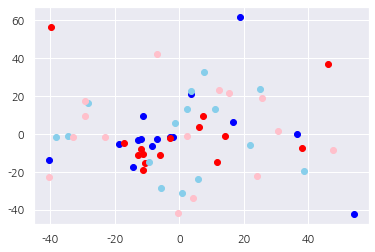

In [30]:
# PCA를 통해 5차원 벡터->2차원 벡터로 줄여 시각화

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pc_A = pca.fit_transform(A)
pc_B = pca.fit_transform(B)
pc_X = pca.fit_transform(X)
pc_Y = pca.fit_transform(Y)

import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots()
ax.scatter(pc_A[:,0], pc_A[:, 1], c='blue', label='A')
ax.scatter(pc_B[:,0], pc_B[:, 1], c='red', label='B')
ax.scatter(pc_X[:,0], pc_X[:, 1], c='skyblue', label='X')
ax.scatter(pc_Y[:,0], pc_Y[:, 1], c='pink', label='Y')

<AxesSubplot:>

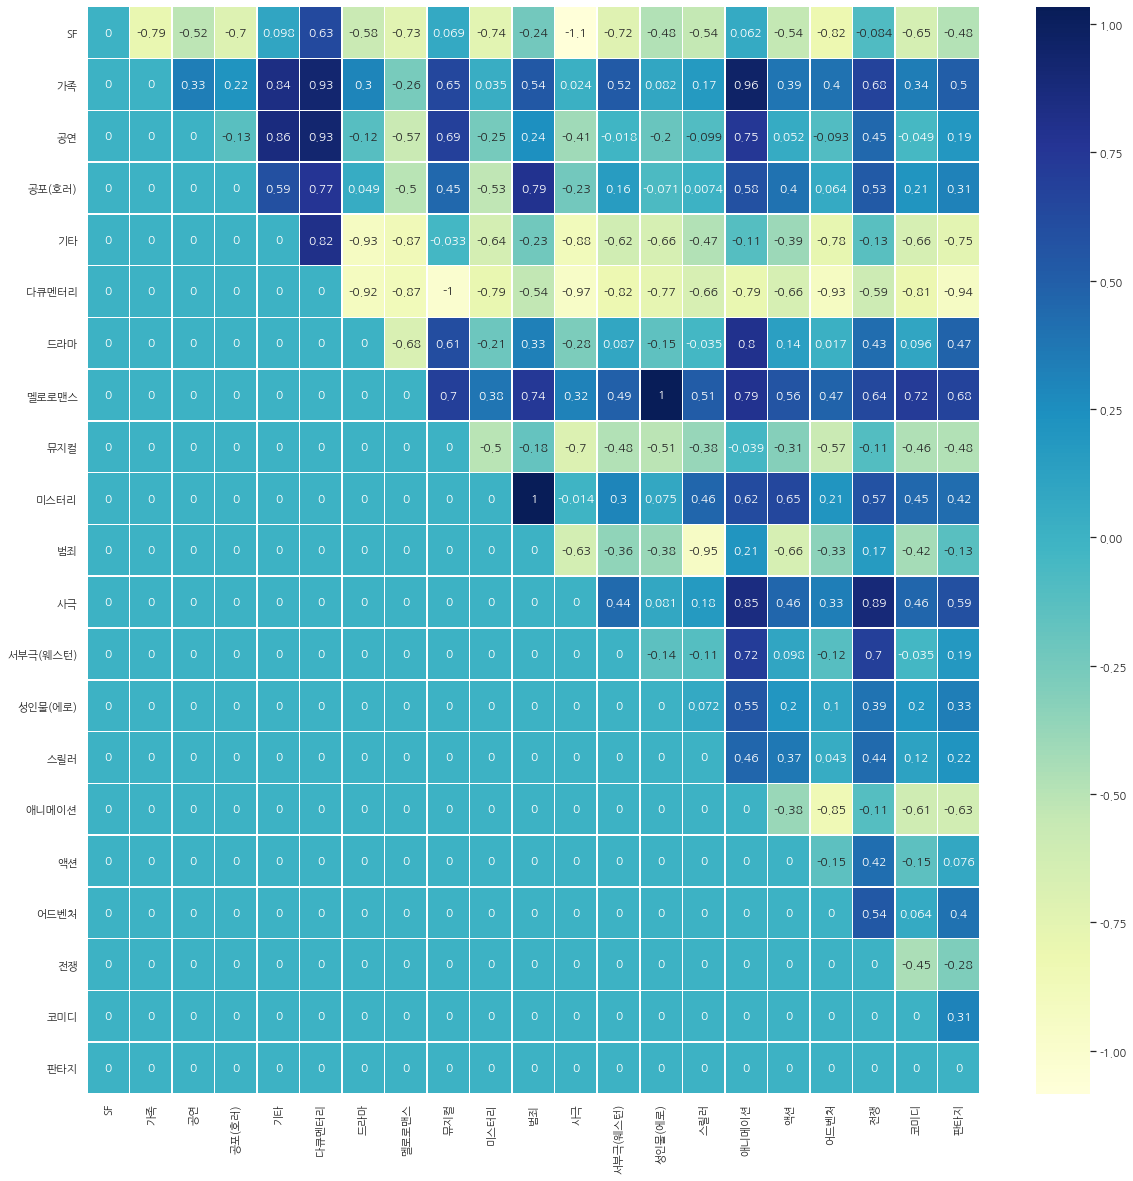

In [31]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

np.random.seed(0)

# 한글 지원 폰트

plt.figure(figsize=(20, 20))
sns.set(font="NanumGothic")

plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, linewidths=.5, annot=True, cmap="YlGnBu")
ax

# 5. WEAT 결과 해석
- WEAT score가 0.8 이상, -0.8이하인 경우만 해석해봅니다.
- WEAT score가 양수일 경우, 해당 단어가 Attribute A와 가깝다는 것이고, 음수가 나오면 Attribute B와 가깝다는 의미입니다. 
    - 음수 => SF-사극, 다큐-뮤지컬, 범죄-스릴러, 다큐-드라마, 애니-어드벤처, 기타-드라마, 다큐-코미디, 다큐-판타지  등
        - 예술영화 : 사극, 뮤지컬, 스릴러, 드라마, 어드벤처, 코미디, 판타지 등
        - 일반영화 : SF, 다큐, 범죄, 애니, 기타 등
    - 양수 => 미스터리-범죄, 멜로-에로, 가족-애니, 가족-다큐, 사극-전쟁, 공연-다큐 등
        - 예술영화 : 미스터리, 멜로, 가족, 사극, 공연 등
        - 일반영화 : 범죄, 에로, 애니, 댜큐, 전쟁 등
- WEAT score의 절대값이 클수록 두 개념축 사이의 편향성이 크다는 의미입니다. 
    - 멜로-에로, SF-사극, 다큐-뮤지컬, 미스터리-범죄는 상대적으로 편향성이 큽니다(절대값 1 이상)
    - 위 히트맵에서 남색(양수), 노랑(음수)인 경우 장르간의 편향성이 큽니다. 


|#|평가문항|상세기준|
|--|--|--|
|1| 주어진 영화 코퍼스를 바탕으로 워드임베딩 모델을 정상적으로 만들었다.|워드임베딩의 most_similar() 메소드 결과가 의미상 바르게 나왔다.|
|2| 영화 구분, 장르별로 target, attribute에 대한 대표성있는 단어 셋을 생성하였다.|타당한 방법론을 통해 중복이 잘 제거되고 개념축을 의미적으로 잘 대표하는 단어 셋이 만들어졌다.|
|3| WEAT score 계산 및 시각화를 정상적으로 진행하였다.|전체 영화 장르별로 예술/일반 영화에 대한 편향성 WEAT score가 상식에 부합하는 수치로 얻어졌으며 이를 잘 시각화하였다.|